## 키움
### batter - Yasiel Puig

In [1]:
from pybaseball import statcast
from pybaseball import playerid_lookup
from pybaseball import statcast_batter
from pybaseball import statcast_fielding
import pybaseball as pyb

In [2]:
import pandas as pd
import numpy as np
import warnings
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False  #그래프 상에서 마이너스 부호가 박스로 깨지는 문제를 해결 

In [3]:
player_info_df = playerid_lookup('puig')
player_info_df.head()
print(player_info_df)
print(player_info_df['key_mlbam'])

Gathering player lookup table. This may take a moment.
  name_last name_first  key_mlbam key_retro key_bbref  key_fangraphs  \
0      puig       rich     120796  puigr101  puigri01        1010563   
1      puig     yasiel     624577  puigy001  puigya01          14225   

   mlb_played_first  mlb_played_last  
0            1974.0           1974.0  
1            2013.0           2019.0  
0    120796
1    624577
Name: key_mlbam, dtype: int32


In [4]:
jwinker_id = player_info_df['key_mlbam'][1]
df = statcast_batter('2010-01-01','2021-12-12', jwinker_id).reset_index(drop=True)
print(df.shape)

Gathering Player Data
(13260, 92)


In [5]:
df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [6]:
#피트 단위의 데이터를 cm로 변경
#x축은 -1을 곱하면서 축 회전
#1feet = 30.48cm
#1mile/h = 1.60934km/h

df['release_pos_x']=df['release_pos_x']*-30.48
df['release_pos_z']=df['release_pos_z']*30.48
df['release_pos_y']=df['release_pos_y']*30.48
df['release_extension']=df['release_extension']*30.48

df['pfx_x']=df['pfx_x']*-30.48
df['pfx_z']=df['pfx_z']*30.48

#개인적으로 홈플레이트는 그대로가 편해서 그대로 나듬
#df['plate_x']=df['plate_x']*-30.48
#df['plate_z']=df['plate_z']*30.48

df['release_speed']=df['release_speed']*1.60934
df['effective_speed']=df['effective_speed']*1.60934

In [7]:
df = df[df['pitch_type'].notnull()]
df = df[df['zone'].notnull()]
df = df[df['type'].notnull()]
df = df[df['stand'].notnull()]
df = df[df['p_throws'].notnull()]
df = df[df['release_speed'].notnull()]
df = df[df['events'].notnull()]

df.reset_index(drop=True)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CH,2015-10-13,134.540824,-40.5384,172.5168,"Puig, Yasiel",624577,571927,field_out,hit_into_play,...,0,3,0,3,0,Standard,Standard,NaN,0.012,-0.257
1,CU,2015-10-13,126.655058,-42.6720,178.3080,"Puig, Yasiel",624577,571927,field_out,hit_into_play,...,0,0,0,0,0,Standard,Standard,NaN,0.029,-0.238
2,FF,2015-10-13,148.703016,21.6408,178.6128,"Puig, Yasiel",624577,112526,strikeout,swinging_strike,...,1,3,1,3,1,Standard,Standard,NaN,0.017,-0.200
3,SL,2015-10-13,143.070326,34.1376,190.8048,"Puig, Yasiel",624577,544727,field_out,hit_into_play,...,1,3,1,3,1,Standard,Standard,NaN,0.007,-0.165
4,FF,2015-10-12,149.346752,14.9352,181.3560,"Puig, Yasiel",624577,112526,strikeout,swinging_strike,...,10,3,10,3,10,Standard,Standard,NaN,0.001,-0.081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,FF,2016-04-04,150.634224,42.3672,203.6064,"Puig, Yasiel",624577,475115,hit_by_pitch,hit_by_pitch,...,0,3,0,3,0,Strategic,Standard,223.0,-0.011,0.278
3532,SI,2016-04-04,148.863950,38.7096,202.0824,"Puig, Yasiel",624577,475115,walk,ball,...,0,3,0,3,0,Standard,Standard,247.0,-0.004,0.115
3533,CU,2016-04-04,133.253352,53.3400,186.2328,"Puig, Yasiel",624577,606131,triple,hit_into_play,...,0,14,0,14,0,Standard,Standard,346.0,0.000,1.284
3534,SL,2016-04-04,140.173514,31.0896,202.6920,"Puig, Yasiel",624577,475115,strikeout,swinging_strike_blocked,...,0,2,0,2,0,Standard,Standard,15.0,0.021,-0.181


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 13259
Data columns (total 92 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pitch_type                       3536 non-null   object 
 1   game_date                        3536 non-null   object 
 2   release_speed                    3536 non-null   float64
 3   release_pos_x                    3536 non-null   float64
 4   release_pos_z                    3536 non-null   float64
 5   player_name                      3536 non-null   object 
 6   batter                           3536 non-null   int64  
 7   pitcher                          3536 non-null   int64  
 8   events                           3536 non-null   object 
 9   description                      3536 non-null   object 
 10  spin_dir                         0 non-null      float64
 11  spin_rate_deprecated             0 non-null      float64
 12  break_angle_depreca

Text(0.5, 1.0, "Puig's homerun scatter")

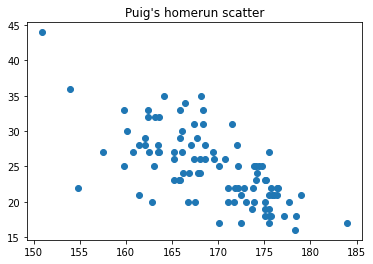

In [9]:
plt.scatter(df[(df['launch_angle']>0)&(df['events']=="home_run")]['launch_speed']*1.609,
            df[(df['launch_angle']>0)&(df['events']=="home_run")]['launch_angle'])
plt.title("Puig's homerun scatter")

In [10]:
base1 = []
base2 = []
base3 = []

#1루 주자 존재 여부
for each in df['on_1b']:
    if each > 1:
        base1.append(1)
    else:
        base1.append(0)
df['on_1b'] = base1

#2루 주자 존재 여부
for each in df['on_2b']:
    if each > 1:
        base2.append(1)
    else:
        base2.append(0)
df['on_2b'] = base2

#3루 주자 존재 여부
for each in df['on_3b']:
    if each > 1:
        base3.append(1)
    else:
        base3.append(0)
df['on_3b'] = base3

In [11]:
# 주자별 상황 분류
Runner_0 = df[(df['on_1b']==0)&(df['on_2b']==0)&(df['on_3b']==0)]
Runner_1 = df[(df['on_1b']==1)&(df['on_2b']==0)&(df['on_3b']==0)]
Runner_2 = df[(df['on_1b']==0)&(df['on_2b']==1)&(df['on_3b']==0)]
Runner_3 = df[(df['on_1b']==0)&(df['on_2b']==0)&(df['on_3b']==1)]
Runner_12 = df[(df['on_1b']==1)&(df['on_2b']==1)&(df['on_3b']==0)]
Runner_13 = df[(df['on_1b']==1)&(df['on_2b']==0)&(df['on_3b']==1)]
Runner_23 = df[(df['on_1b']==0)&(df['on_2b']==1)&(df['on_3b']==1)]
Runner_123 = df[(df['on_1b']==1)&(df['on_2b']==1)&(df['on_3b']==1)]

In [12]:
# 해당 타석에서의 아웃 카운트 & 주자여부
# 노아웃 시 주자여부
outs_0_0B = Runner_0[(Runner_0['outs_when_up']==0)]
outs_0_1B = Runner_1[(Runner_1['outs_when_up']==0)]
outs_0_2B = Runner_2[(Runner_2['outs_when_up']==0)]
outs_0_3B = Runner_3[(Runner_3['outs_when_up']==0)]
outs_0_12B = Runner_12[(Runner_12['outs_when_up']==0)]
outs_0_13B = Runner_13[(Runner_13['outs_when_up']==0)]
outs_0_23B = Runner_23[(Runner_23['outs_when_up']==0)]
outs_0_123B = Runner_123[(Runner_123['outs_when_up']==0)]

# 1아웃 시 주자여부
outs_1_0B = Runner_0[(Runner_0['outs_when_up']==1)]
outs_1_1B = Runner_1[(Runner_1['outs_when_up']==1)]
outs_1_2B = Runner_2[(Runner_2['outs_when_up']==1)]
outs_1_3B = Runner_3[(Runner_3['outs_when_up']==1)]
outs_1_12B = Runner_12[(Runner_12['outs_when_up']==1)]
outs_1_13B = Runner_13[(Runner_13['outs_when_up']==1)]
outs_1_23B = Runner_23[(Runner_23['outs_when_up']==1)]
outs_1_123B = Runner_123[(Runner_123['outs_when_up']==1)]

# 2아웃 시 주자여부
outs_2_0B = Runner_0[(Runner_0['outs_when_up']==2)]
outs_2_1B = Runner_1[(Runner_1['outs_when_up']==2)]
outs_2_2B = Runner_2[(Runner_2['outs_when_up']==2)]
outs_2_3B = Runner_3[(Runner_3['outs_when_up']==2)]
outs_2_12B = Runner_12[(Runner_12['outs_when_up']==2)]
outs_2_13B = Runner_13[(Runner_13['outs_when_up']==2)]
outs_2_23B = Runner_23[(Runner_23['outs_when_up']==2)]
outs_2_123B = Runner_123[(Runner_123['outs_when_up']==2)]

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

- 홈런 당시 형성된 존의 위치 분포

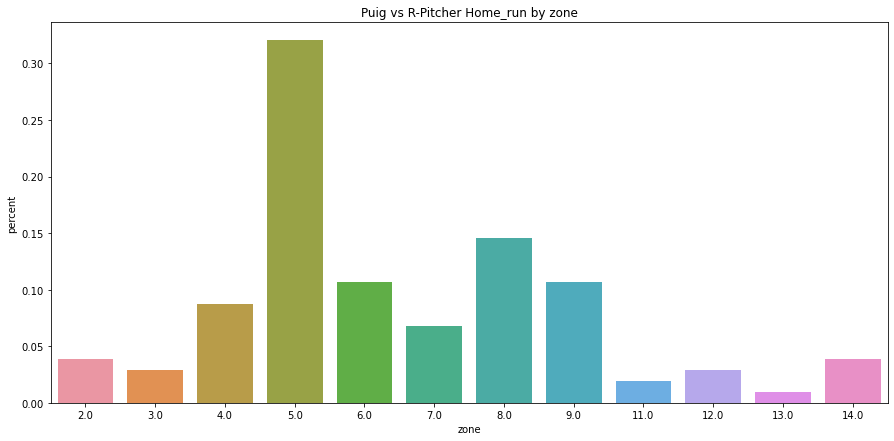

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(15,7))
tmp = df[(df['stand']=='R')&(df['p_throws']=='R')&(df['events']=='home_run')]
tmp2 = tmp['zone'].value_counts(normalize=True).reset_index().rename({'index':'zone','zone':'percent'}, axis=1)
sns.barplot(x='zone', y='percent', data = tmp2)
plt.title('Puig vs R-Pitcher Home_run by zone')
plt.show()
plt.savefig('Puig vs R-Pitcher Home_run by zone.png')

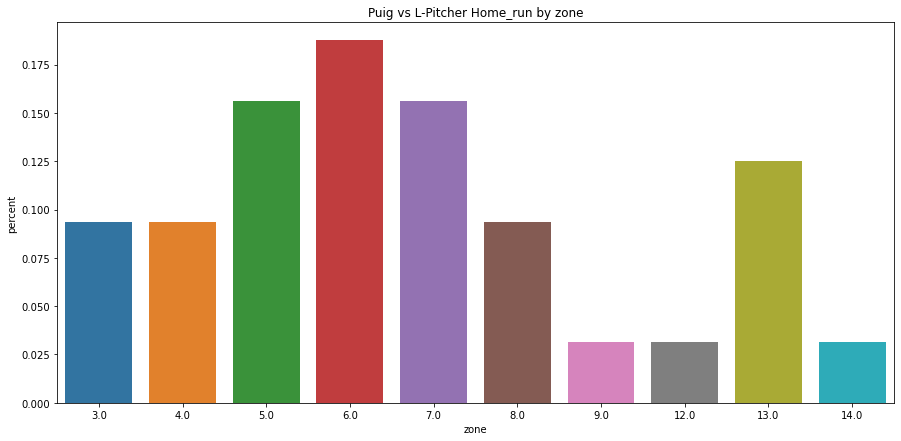

In [15]:
plt.figure(figsize=(15,7))
tmp = df[(df['stand']=='R')&(df['p_throws']=='L')&(df['events']=='home_run')]
tmp2 = tmp['zone'].value_counts(normalize=True).reset_index().rename({'index':'zone','zone':'percent'}, axis=1)
sns.barplot(x='zone', y='percent', data = tmp2)
plt.title('Puig vs L-Pitcher Home_run by zone')
plt.savefig('Puig vs L-Pitcher Home_run by zone.png')

- 홈런 당시 던진 투구의 구종 분포

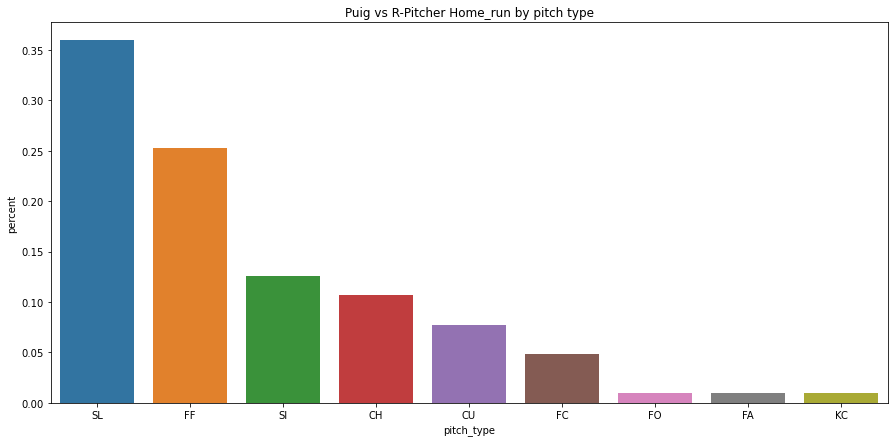

In [16]:
plt.figure(figsize=(15,7))
tmp = df[(df['stand']=='R')&(df['p_throws']=='R')&(df['events']=='home_run')]
tmp2 = tmp['pitch_type'].value_counts(normalize=True).reset_index().rename({'index':'pitch_type','pitch_type':'percent'}, axis=1)
sns.barplot(x='pitch_type', y='percent', data = tmp2)
plt.title('Puig vs R-Pitcher Home_run by pitch type')
plt.savefig('Puig vs R-Pitcher Home_run by pitch type.png')

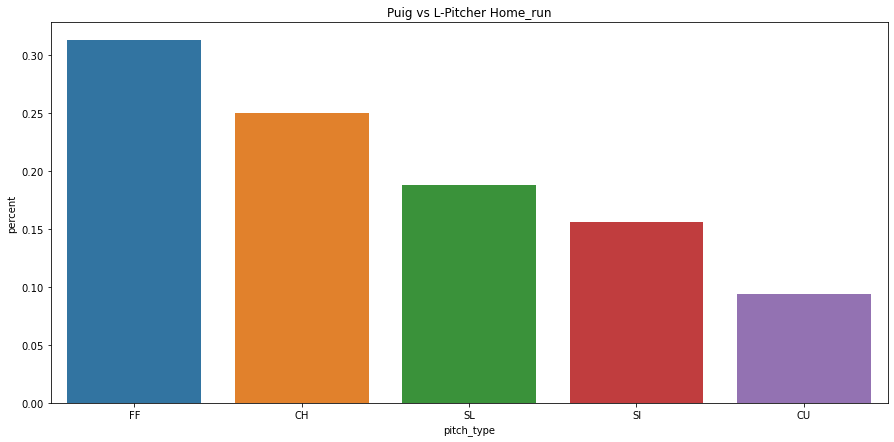

In [17]:
plt.figure(figsize=(15,7))
tmp = df[(df['stand']=='R')&(df['p_throws']=='L')&(df['events']=='home_run')]
tmp2 = tmp['pitch_type'].value_counts(normalize=True).reset_index().rename({'index':'pitch_type','pitch_type':'percent'}, axis=1)
sns.barplot(x='pitch_type', y='percent', data = tmp2)
plt.title('Puig vs L-Pitcher Home_run')
plt.savefig('Puig vs L-Pitcher Home_run by pitch type.png')

- base 상에 주자 여부에 따른 타격분포

In [18]:
def location_box(a, title):
    plt.clf()
    #로케이션 박스 
    L, C, R = -0.708333, 0, +0.708333
    Bot, Center, Top = 1.5, 2.5, 3.5
    plt.figure(figsize=(4.5,6), dpi=100)
    plt.plot([L, L], [Bot, Top], c='black', lw=1.5)
    plt.plot([R, R], [Bot, Top], c='black', lw=1.5)
    plt.plot([L, R], [Bot, Bot], c='black', lw=1.5)
    plt.plot([L, R], [Top, Top], c='black', lw=1.5)
    
    plt.plot([L+(R-L)/3,L+(R-L)/3], [Bot, Top], c='gray', lw=1)
    plt.plot([R-(R-L)/3,R-(R-L)/3], [Bot, Top], c='gray', lw=1)
    plt.plot([L, R], [Top-(Top-Bot)/3, Top-(Top-Bot)/3], c='gray', lw=1)
    plt.plot([L, R], [Bot+(Top-Bot)/3, Bot+(Top-Bot)/3], c='gray', lw=1)

    plt.plot([L*1.5, R*1.5], [Top+.5, Top+.5], c='black', lw=1.5)
    plt.plot([L*1.5, R*1.5], [Bot-.5, Bot-.5], c='black', lw=1.5)
    plt.plot([L*1.5, L*1.5], [Bot-.5, Top+.5], c='black', lw=1.5)
    plt.plot([R*1.5, R*1.5], [Top+.5, Bot-.5], c='black', lw=1.5)
    
    plt.plot([C, C], [Top+.5, Top], c='gray', lw=1)
    plt.plot([C, C], [Bot, Bot-.5], c='gray', lw=1)
    plt.plot([L*1.5, L], [Center, Center], c='gray', lw=1)
    plt.plot([R, R*1.5], [Center, Center], c='gray', lw=1)

    plt.scatter(a['plate_x'], a['plate_z'])
    plt.title(title)
    plt.xlim=[L*1.5, R*1.5]
    plt.ylim=[Bot-.5, Top+.5]
    plt.savefig(title+'.png')

In [19]:
df['events'].unique()

array(['field_out', 'strikeout', 'single', 'force_out', 'home_run',
       'walk', 'double', 'triple', 'fielders_choice_out',
       'grounded_into_double_play', 'sac_fly', 'double_play',
       'intent_walk', 'hit_by_pitch', 'field_error',
       'strikeout_double_play', 'caught_stealing_2b', 'fielders_choice',
       'sac_bunt', 'pickoff_1b', 'other_out'], dtype=object)

<Figure size 432x288 with 0 Axes>

<Figure size 450x600 with 0 Axes>

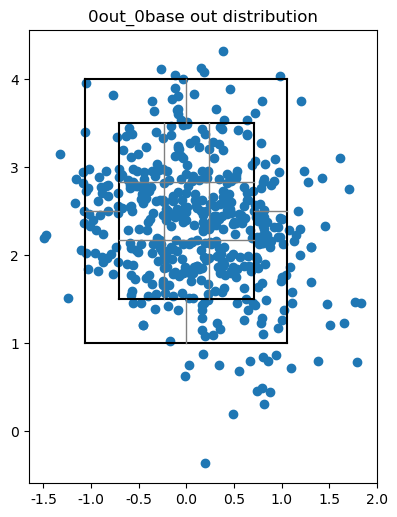

In [20]:
# 노아웃 주자 없음
con0_0_h = outs_0_0B[(outs_0_0B['events']=='single')|(outs_0_0B['events']=='double')|(outs_0_0B['events']=='triple')|(outs_0_0B['events']=='home_run')]
con0_0_o = outs_0_0B[(outs_0_0B['events']=='field_out')|(outs_0_0B['events']=='strikeout')|(outs_0_0B['events']=='other_out')]

location_box(con0_0_h, "0out_0base Hit distribution")
location_box(con0_0_o, "0out_0base out distribution")

<Figure size 432x288 with 0 Axes>

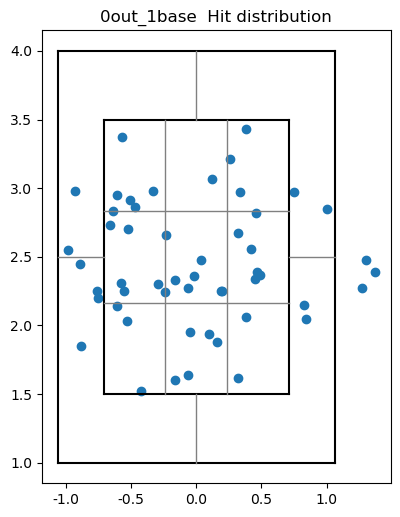

In [21]:
# 노아웃 주자 1루 시 타격 분포
tmp0_1 = outs_0_1B[(outs_0_1B['events']=='single')|(outs_0_1B['events']=='double')|(outs_0_1B['events']=='triple')|(outs_0_1B['events']=='home_run')]
location_box(tmp0_1, "0out_1base  Hit distribution")

<Figure size 432x288 with 0 Axes>

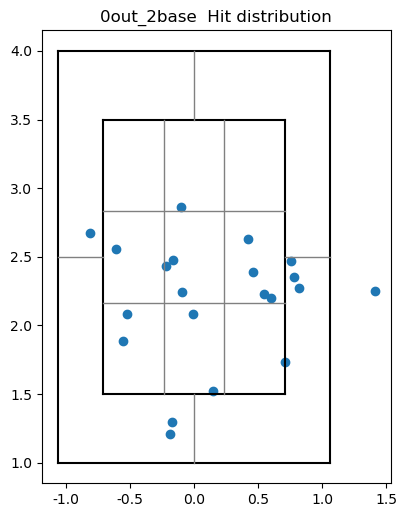

In [22]:
# 노아웃 주자 2루 시 타격 분포
tmp0_2 = outs_0_2B[(outs_0_2B['events']=='single')|(outs_0_2B['events']=='double')|(outs_0_2B['events']=='triple')|(outs_0_2B['events']=='home_run')]
location_box(tmp0_2, "0out_2base  Hit distribution")

<Figure size 432x288 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

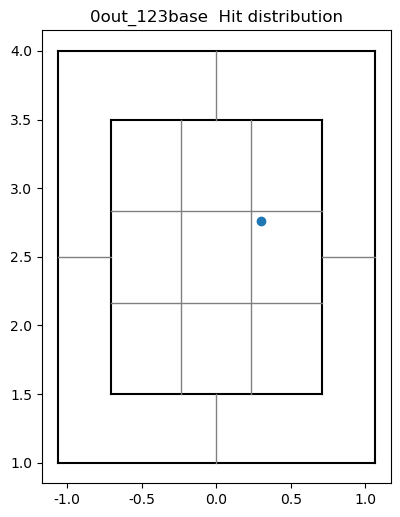

In [23]:
# 노아웃 주자 없음 시 타격 분포
tmp0_0 = outs_0_0B[(outs_0_0B['events']=='single')|(outs_0_0B['events']=='double')|(outs_0_0B['events']=='triple')|(outs_0_0B['events']=='home_run')]
location_box(tmp0_0, "0out_0base  Hit distribution")
# 노아웃 주자 1루 시 타격 분포
tmp0_1 = outs_0_1B[(outs_0_1B['events']=='single')|(outs_0_1B['events']=='double')|(outs_0_1B['events']=='triple')|(outs_0_1B['events']=='home_run')]
location_box(tmp0_1, "0out_1base  Hit distribution")
# 노아웃 주자 2루 시 타격 분포
tmp0_2 = outs_0_2B[(outs_0_2B['events']=='single')|(outs_0_2B['events']=='double')|(outs_0_2B['events']=='triple')|(outs_0_2B['events']=='home_run')]
location_box(tmp0_2, "0out_2base  Hit distribution")
# 노아웃 주자 3루 시 타격 분포
tmp0_3 = outs_0_3B[(outs_0_3B['events']=='single')|(outs_0_3B['events']=='double')|(outs_0_3B['events']=='triple')|(outs_0_3B['events']=='home_run')]
location_box(tmp0_3, "0out_3base  Hit distribution")
# 노아웃 주자 1,2루 시 타격 분포
tmp0_12 = outs_0_12B[(outs_0_12B['events']=='single')|(outs_0_12B['events']=='double')|(outs_0_12B['events']=='triple')|(outs_0_12B['events']=='home_run')]
location_box(tmp0_12, "0out_12base  Hit distribution")
# 노아웃 주자 1,3루 시 타격 분포
tmp0_13 = outs_0_13B[(outs_0_13B['events']=='single')|(outs_0_13B['events']=='double')|(outs_0_13B['events']=='triple')|(outs_0_13B['events']=='home_run')]
location_box(tmp0_13, "0out_13base  Hit distribution")
# 노아웃 주자 2,3루 시 타격 분포
tmp0_23 = outs_0_23B[(outs_0_23B['events']=='single')|(outs_0_23B['events']=='double')|(outs_0_23B['events']=='triple')|(outs_0_23B['events']=='home_run')]
location_box(tmp0_23, "0out_23base  Hit distribution")
# 노아웃 주자 만루 시 타격 분포
tmp0_123 = outs_0_123B[(outs_0_123B['events']=='single')|(outs_0_123B['events']=='double')|(outs_0_123B['events']=='triple')|(outs_0_123B['events']=='home_run')]
location_box(tmp0_123, "0out_123base  Hit distribution")

<Figure size 432x288 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

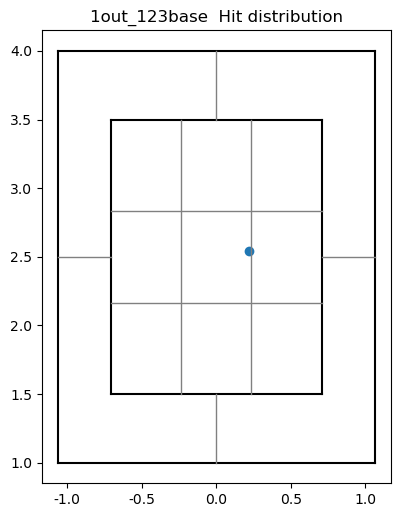

In [24]:
# 1아웃 주자 없음 시 타격 분포
tmp1_0 = outs_1_0B[(outs_1_0B['events']=='single')|(outs_1_0B['events']=='double')|(outs_1_0B['events']=='triple')|(outs_1_0B['events']=='home_run')]
location_box(tmp0_0, "1out_0base  Hit distribution")
# 1아웃 주자 1루 시 타격 분포
tmp1_1 = outs_1_1B[(outs_1_1B['events']=='single')|(outs_1_1B['events']=='double')|(outs_1_1B['events']=='triple')|(outs_1_1B['events']=='home_run')]
location_box(tmp0_1, "1out_1base  Hit distribution")
# 1아웃 주자 2루 시 타격 분포
tmp1_2 = outs_1_2B[(outs_1_2B['events']=='single')|(outs_1_2B['events']=='double')|(outs_1_2B['events']=='triple')|(outs_1_2B['events']=='home_run')]
location_box(tmp0_2, "1out_2base  Hit distribution")
# 노아웃 주자 3루 시 타격 분포
tmp1_3 = outs_1_3B[(outs_1_3B['events']=='single')|(outs_1_3B['events']=='double')|(outs_1_3B['events']=='triple')|(outs_1_3B['events']=='home_run')]
location_box(tmp0_3, "1out_3base  Hit distribution")
# 1아웃 주자 1,2루 시 타격 분포
tmp1_12 = outs_1_12B[(outs_1_12B['events']=='single')|(outs_1_12B['events']=='double')|(outs_1_12B['events']=='triple')|(outs_1_12B['events']=='home_run')]
location_box(tmp0_12, "1out_12base  Hit distribution")
# 1아웃 주자 1,3루 시 타격 분포
tmp1_13 = outs_1_13B[(outs_1_13B['events']=='single')|(outs_1_13B['events']=='double')|(outs_1_13B['events']=='triple')|(outs_1_13B['events']=='home_run')]
location_box(tmp0_13, "1out_13base  Hit distribution")
# 노아웃 주자 2,3루 시 타격 분포
tmp1_23 = outs_1_23B[(outs_1_23B['events']=='single')|(outs_1_23B['events']=='double')|(outs_1_23B['events']=='triple')|(outs_1_23B['events']=='home_run')]
location_box(tmp0_23, "1out_23base  Hit distribution")
# 노아웃 주자 만루 시 타격 분포
tmp1_123 = outs_1_123B[(outs_0_123B['events']=='single')|(outs_1_123B['events']=='double')|(outs_1_123B['events']=='triple')|(outs_1_123B['events']=='home_run')]
location_box(tmp1_123, "1out_123base  Hit distribution")

<Figure size 432x288 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

<Figure size 450x600 with 0 Axes>

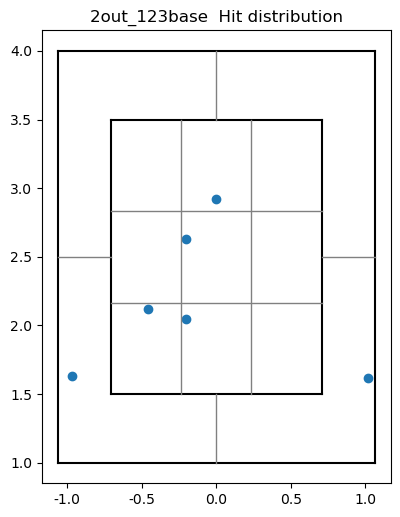

In [25]:
# 2아웃 주자 없음 시 타격 분포
tmp2_0 = outs_2_0B[(outs_2_0B['events']=='single')|(outs_2_0B['events']=='double')|(outs_2_0B['events']=='triple')|(outs_2_0B['events']=='home_run')]
location_box(tmp2_0, "2out_0base  Hit distribution")
# 2아웃 주자 1루 시 타격 분포
tmp2_1 = outs_2_1B[(outs_2_1B['events']=='single')|(outs_2_1B['events']=='double')|(outs_2_1B['events']=='triple')|(outs_2_1B['events']=='home_run')]
location_box(tmp2_1, "2out_1base  Hit distribution")
# 2아웃 주자 2루 시 타격 분포
tmp2_2 = outs_2_2B[(outs_2_2B['events']=='single')|(outs_2_2B['events']=='double')|(outs_2_2B['events']=='triple')|(outs_2_2B['events']=='home_run')]
location_box(tmp2_2, "2out_2base  Hit distribution")
# 2아웃 주자 3루 시 타격 분포
tmp2_3 = outs_2_3B[(outs_2_3B['events']=='single')|(outs_2_3B['events']=='double')|(outs_2_3B['events']=='triple')|(outs_2_3B['events']=='home_run')]
location_box(tmp2_3, "2out_3base  Hit distribution")
# 2아웃 주자 1,2루 시 타격 분포
tmp2_12 = outs_2_12B[(outs_2_12B['events']=='single')|(outs_2_12B['events']=='double')|(outs_2_12B['events']=='triple')|(outs_2_12B['events']=='home_run')]
location_box(tmp2_12, "2out_12base  Hit distribution")
# 2아웃 주자 1,3루 시 타격 분포
tmp2_13 = outs_2_13B[(outs_2_13B['events']=='single')|(outs_2_13B['events']=='double')|(outs_2_13B['events']=='triple')|(outs_2_13B['events']=='home_run')]
location_box(tmp2_13, "2out_13base  Hit distribution")
# 2아웃 주자 2,3루 시 타격 분포
tmp2_23 = outs_2_23B[(outs_2_23B['events']=='single')|(outs_2_23B['events']=='double')|(outs_2_23B['events']=='triple')|(outs_2_23B['events']=='home_run')]
location_box(tmp2_23, "2out_23base  Hit distribution")
# 2아웃 주자 만루 시 타격 분포
tmp2_123 = outs_2_123B[(outs_2_123B['events']=='single')|(outs_2_123B['events']=='double')|(outs_2_123B['events']=='triple')|(outs_2_123B['events']=='home_run')]
location_box(tmp2_123, "2out_123base  Hit distribution")

In [26]:
tmp2_123.shape

(6, 92)

In [27]:
df['game_year'].unique()

array([2015, 2014, 2013, 2019, 2018, 2017, 2016], dtype=int64)

In [28]:
df_2015 = df.loc[df['game_year']==2015]
df_2015.shape

(317, 92)

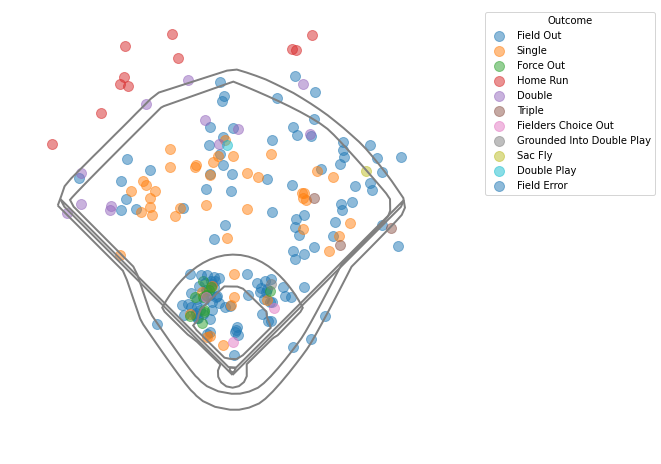

In [29]:
pyb.spraychart(df_2015, 'reds')

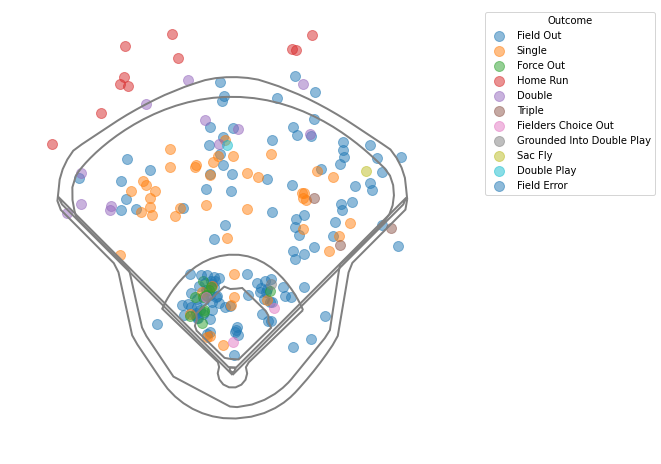

<Figure size 432x288 with 0 Axes>

In [30]:
pyb.spraychart(df_2015, 'dodgers', colorby='events')
plt.savefig('k.png')